# Criando os nomes

In [1]:
import pandas as pd

In [2]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [3]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [4]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


In [5]:
print("A quantidade de nomes é: " + str(len(nomes_f) + len(nomes_m)))

A quantidade de nomes é: 400


In [6]:
frames = [nomes_f, nomes_m]

In [7]:
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [8]:
nomes = pd.concat(frames)['nome'].to_frame()

In [9]:
nomes.sample(5)

,nome
155,CECILIA
109,CELSO
196,IVONETE
121,ADEMIR
0,MARIA


# Incluido ID dos alunos

In [10]:
import numpy as np

In [11]:
np.random.seed(123)

In [12]:
total_alunos = len(nomes)
total_alunos

400

In [13]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [14]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [15]:
dominios = ['@dominioemail.com.br', '@servicoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [16]:
nomes.sample(5)

,nome,id_aluno,dominio
84,SEVERINO,78,@dominioemail.com.br
0,JOSE,331,@servicoemail.com
179,IAGO,340,@dominioemail.com.br
10,SANDRA,174,@dominioemail.com.br
171,TERESINHA,45,@dominioemail.com.br


In [17]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [18]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@dominioemail.com.br,arthur@dominioemail.com.br
57,DAIANE,303,@servicoemail.com,daiane@servicoemail.com
85,HELENA,221,@dominioemail.com.br,helena@dominioemail.com.br
183,IRACI,8,@dominioemail.com.br,iraci@dominioemail.com.br
189,DALVA,137,@dominioemail.com.br,dalva@dominioemail.com.br


# Criando a tabela Cursos

In [19]:
!pip3 install html5lib
!pip3 install lxml

In [20]:
import html5lib

In [21]:
url = 'http://tabela-cursos.herokuapp.com/index.html'

In [22]:
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [23]:
type(cursos)

list

In [24]:
cursos = cursos[0]

In [25]:
cursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [26]:
type(cursos)

pandas.core.frame.DataFrame

In [27]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [28]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})

In [29]:
cursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [30]:
cursos['id'] = cursos.index + 1

In [31]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [32]:
cursos = cursos.set_index('id')

In [33]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [34]:
nomes.sample(5)

,nome,id_aluno,dominio,email
59,ISABEL,83,@dominioemail.com.br,isabel@dominioemail.com.br
172,REBECA,165,@servicoemail.com,rebeca@servicoemail.com
130,JUNIOR,184,@dominioemail.com.br,junior@dominioemail.com.br
70,JOAQUIM,248,@servicoemail.com,joaquim@servicoemail.com
171,VALDEMIR,3,@dominioemail.com.br,valdemir@dominioemail.com.br


# Matriculando os alunos nos cursos

In [35]:
nomes.sample(5)

,nome,id_aluno,dominio,email
189,DALVA,137,@dominioemail.com.br,dalva@dominioemail.com.br
144,VINICIOS,147,@servicoemail.com,vinicios@servicoemail.com
69,TEREZA,151,@servicoemail.com,tereza@servicoemail.com
105,PABLO,141,@dominioemail.com.br,pablo@dominioemail.com.br
109,CELSO,266,@servicoemail.com,celso@servicoemail.com


In [36]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [37]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
15,LETICIA,347,@dominioemail.com.br,leticia@dominioemail.com.br,2
157,JAIME,214,@servicoemail.com,jaime@servicoemail.com,1
36,ROBERTO,364,@dominioemail.com.br,roberto@dominioemail.com.br,2
91,CELIA,367,@dominioemail.com.br,celia@dominioemail.com.br,2
183,MARLON,74,@servicoemail.com,marlon@servicoemail.com,1


In [38]:
nomes.matriculas.describe()

count    400.000000
mean       2.110000
std        1.560123
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: matriculas, dtype: float64

In [39]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


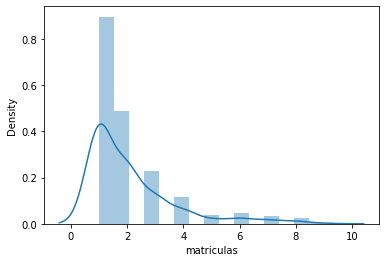

In [40]:
sns.distplot(nomes.matriculas)

In [41]:
nomes.matriculas.value_counts()

1    191
2    104
3     49
4     25
6     10
5      8
7      7
8      5
9      1
Name: matriculas, dtype: int64

In [42]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
34,CRISTIANE,350,@dominioemail.com.br,cristiane@dominioemail.com.br,1
154,NICOLE,182,@dominioemail.com.br,nicole@dominioemail.com.br,7
191,TERESA,264,@dominioemail.com.br,teresa@dominioemail.com.br,3
132,GABRIELE,72,@dominioemail.com.br,gabriele@dominioemail.com.br,6
110,LUCIENE,22,@dominioemail.com.br,luciene@dominioemail.com.br,1


# Selecionando Cursos

In [43]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
13,BRUNA,34,@servicoemail.com,bruna@servicoemail.com,1
76,CRISTIANO,154,@servicoemail.com,cristiano@servicoemail.com,3
4,CARLOS,230,@servicoemail.com,carlos@servicoemail.com,1
11,GABRIEL,219,@servicoemail.com,gabriel@servicoemail.com,2
82,SOLANGE,7,@dominioemail.com.br,solange@dominioemail.com.br,2


In [44]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [45]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [46]:
matriculas.head(5)

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1


In [47]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno' : 'qtd_de_alunos'})

In [48]:
matriculas_por_curso

,qtd_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [49]:
# os dataframes que criamos

nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
80,TAIS,179,@dominioemail.com.br,tais@dominioemail.com.br,1
116,MARCELA,261,@servicoemail.com,marcela@servicoemail.com,2
91,WESLEY,255,@dominioemail.com.br,wesley@dominioemail.com.br,1


In [50]:
cursos.head(3)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web


In [51]:
matriculas_por_curso.head(3)

,qtd_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web


# Saidas em diferentes formatos

In [52]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [53]:
pd.read_csv('matriculas_por_curso.csv')

,qtd_de_alunos,nome_do_curso
0,94,Lógica de programação
1,65,Java para Web
2,57,C# para Web
3,51,Ruby on Rails
4,6,Cursos de Python
5,32,PHP com MySql
6,11,.NET para web
7,59,Novas integrações com Java
8,8,TDD com Java
9,48,Código limpo com C#


In [54]:
matriculas_json = matriculas_por_curso.to_json()

In [55]:
matriculas_json

'{"qtd_de_alunos":{"1":94,"2":65,"3":57,"4":51,"5":6,"6":32,"7":11,"8":59,"9":8,"10":48,"11":23,"12":37,"13":8,"14":47,"15":70,"16":21,"17":7,"18":92,"19":45,"20":63},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [56]:
matriculas_html = matriculas_por_curso.to_html()

In [57]:
matriculas_html

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>qtd_de_alunos</th>\n      <th>nome_do_curso</th>\n    </tr>\n    <tr>\n      <th>id_curso</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>1</th>\n      <td>94</td>\n      <td>Lógica de programação</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>65</td>\n      <td>Java para Web</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>57</td>\n      <td>C# para Web</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>51</td>\n      <td>Ruby on Rails</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>6</td>\n      <td>Cursos de Python</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>32</td>\n      <td>PHP com MySql</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>11</td>\n      <td>.NET para web</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>59</td>\n      <td>Novas integrações com Java</td>\n    </tr

In [58]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>qtd_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>94</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>65</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>57</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>51</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>6</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>32</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>11</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>59</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>8</td>
      <td

# Criando banco SQL

In [59]:
!pip3 install sqlalchemy

In [60]:
from sqlalchemy import create_engine, MetaData, Table

In [61]:
engine = create_engine('sqlite:///:memory:')

In [62]:
engine

Engine(sqlite:///:memory:)

In [63]:
type(engine)

sqlalchemy.engine.base.Engine

In [64]:
matriculas_por_curso.head(3)

,qtd_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web


In [65]:
matriculas_por_curso.to_sql('matriculas', engine)

In [66]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando o banco SQL

In [67]:
query = 'select * from matriculas where qtd_de_alunos < 20'

In [68]:
pd.read_sql(query, engine)

,id_curso,qtd_de_alunos,nome_do_curso
0,5,6,Cursos de Python
1,7,11,.NET para web
2,9,8,TDD com Java
3,13,8,Persistência com .NET
4,17,7,Internet das coisas


In [69]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qtd_de_alunos'])

,nome_do_curso,qtd_de_alunos
0,Lógica de programação,94
1,Java para Web,65
2,C# para Web,57
3,Ruby on Rails,51
4,Cursos de Python,6
5,PHP com MySql,32
6,.NET para web,11
7,Novas integrações com Java,59
8,TDD com Java,8
9,Código limpo com C#,48


In [70]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'qtd_de_alunos'])

In [71]:
muitas_matriculas = muitas_matriculas.query('qtd_de_alunos > 80')

In [72]:
muitas_matriculas

,nome_do_curso,qtd_de_alunos
0,Lógica de programação,94
17,Programação funcional,92


# Escrevendo no banco

In [73]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [74]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos e alunas da próxima turma

In [76]:
matriculas_por_curso.head(20)

,qtd_de_alunos,nome_do_curso
id_curso,,
1,94,Lógica de programação
2,65,Java para Web
3,57,C# para Web
4,51,Ruby on Rails
5,6,Cursos de Python
6,32,PHP com MySql
7,11,.NET para web
8,59,Novas integrações com Java
9,8,TDD com Java


In [77]:
matriculas

,id_aluno,id_curso
0,235,1
1,235,1
2,235,15
3,43,2
4,304,1
...,...,...
839,383,3
840,383,18
841,383,18
842,383,12


In [79]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
35,10,16
107,233,16
109,281,16
157,203,16
181,381,16
244,289,16
387,137,16
457,321,16
485,322,16
521,384,16


In [80]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
166,KELLY,109,@dominioemail.com.br,kelly@dominioemail.com.br,3
66,DANILO,348,@dominioemail.com.br,danilo@dominioemail.com.br,6
98,GILSON,134,@dominioemail.com.br,gilson@dominioemail.com.br,6


In [82]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
10,16,MARIANA,@servicoemail.com,mariana@servicoemail.com,2
233,16,ELAINE,@servicoemail.com,elaine@servicoemail.com,1
281,16,REGINA,@dominioemail.com.br,regina@dominioemail.com.br,5
203,16,TATIANE,@dominioemail.com.br,tatiane@dominioemail.com.br,5
381,16,CRISTINA,@dominioemail.com.br,cristina@dominioemail.com.br,3
289,16,IVONE,@servicoemail.com,ivone@servicoemail.com,1
137,16,DALVA,@dominioemail.com.br,dalva@dominioemail.com.br,3
321,16,FERNANDO,@dominioemail.com.br,fernando@dominioemail.com.br,6
322,16,MARCIO,@dominioemail.com.br,marcio@dominioemail.com.br,4


In [83]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
10       MARIANA
233       ELAINE
281       REGINA
203      TATIANE
381     CRISTINA
289        IVONE
137        DALVA
321     FERNANDO
322       MARCIO
384       RENATO
337         ALEX
154    CRISTIANO
66          LUAN
15        VAGNER
44       NICOLAS
271       NILTON
376      AUGUSTO
159      ORLANDO
147     VINICIOS
351      EMANUEL
362      NIVALDO
Name: nome, dtype: object

In [84]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA
289,IVONE
137,DALVA
321,FERNANDO
322,MARCIO


In [86]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [87]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [88]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()
proxima_turma

,nome
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA
289,IVONE
137,DALVA
321,FERNANDO
322,MARCIO


In [90]:
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {}'.format(nome_curso)})
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
10,MARIANA
233,ELAINE
281,REGINA
203,TATIANE
381,CRISTINA
289,IVONE
137,DALVA
321,FERNANDO
322,MARCIO


In [91]:
proxima_turma.sample(5)

,Alunos do curso de Estatística básica
id_aluno,
351,EMANUEL
321,FERNANDO
322,MARCIO
362,NIVALDO
381,CRISTINA


# Excel

In [92]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [93]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,MARIANA
1,ELAINE
2,REGINA
3,TATIANE
4,CRISTINA
5,IVONE
6,DALVA
7,FERNANDO
8,MARCIO
9,RENATO
